<h3>Import packages</h3>

In [56]:
from statsmodels.stats.power import zt_ind_solve_power, tt_ind_solve_power
import statsmodels.stats.proportion as prop
from statsmodels.stats.power import TTestIndPower
import numpy as np
import matplotlib.pyplot as plt

<h3>Functions</h3>

In [61]:
#cntrl_conv => conversion of the control (min effect size)
#desired_conv => desired converion of the treatment group (effect size)
#prob_achieve_desired => probability that you reach the desired conversion amount, usually 80%+
#sig_error => level of error willing to have whereby significance is incorrectly observed (type 1)

def calculate_zsample(cntrl_conv, desired_conv, prob_achieve_desired, sig_error):
    std_effect = prop.proportion_effectsize(cntrl_conv, desired_conv)
    sample = zt_ind_solve_power(effect_size=std_effect, nobs1=None, alpha=sig_error, power=prob_achieve_desired)
    return round(sample,2)
    
def calculate_tsample(cntrl_conv, desired_conv, prob_achieve_desired, sig_error):
    std_effect = prop.proportion_effectsize(cntrl_conv, desired_conv)
    sample = tt_ind_solve_power(effect_size=std_effect, nobs1=None, alpha=sig_error, power=prob_achieve_desired)
    return round(sample,2)

<h3>Using functions</h3>

In [58]:
z = calculate_zsample(0.1,0.12,0.8,0.05)
print('Z-test sample size required for significant lift:', z)
t = calculate_tsample(0.1,0.12,0.8,0.05)
print('T-test sample size required for significant lift:', t)

Z-test sample size required for significant lift: 3834.6
T-test sample size required for significant lift: 3835.56


<h3>Visualize power with t-test using sample sizes and desired conversion</h3>

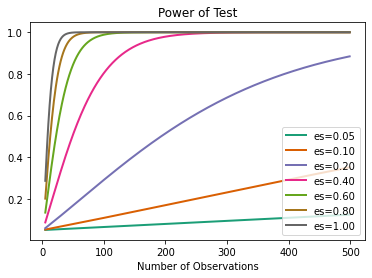

In [55]:
output = TTestIndPower()
sample_sizes = np.array(range(5, 500))
effect_sizes = np.array([0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1])

output.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()